In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Audio
import scipy.signal as sg
import librosa

In [2]:
x,fs = librosa.load('signals/cello.wav', sr=8000)
N = 8192
x = x[:N]
Audio(x, rate=fs)

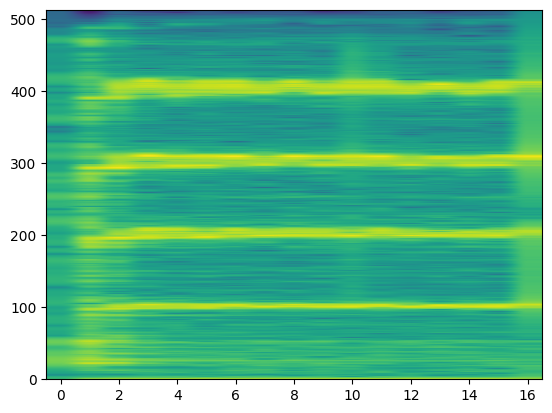

In [3]:
stft = librosa.stft(x, window='cosine', n_fft=1024, win_length=1024, hop_length=512)

with plt.ion():
    fig, ax = plt.subplots(1,1,)
    ax.imshow(np.log(np.abs(stft)**2), origin='lower')
    ax.set_aspect('auto')

In [4]:
from src.aps_metric.perf_metrics import musical_noise_measure_aps
from src.methods.method_hard_threshold import NewMethod as ht
# from src.methods.method_garrote_threshold import NewMethod as gt
# from methods.not_method_soft_threshold import NewMethod as st
from src.methods.method_delaunay_triangulation import delaunay_triangulation_denoising 

Nfft = 2*1024

# Declare the methods
hard_thresholding =  ht().method
# soft_thresholding = st().method
# garrote_thresholding = gt().method

# Compute activity from target signal
# y = librosa.resample(x, orig_sr=fs, target_sr=48000)
# act = activity(y,fs=48000)
# act = activity_2(y,fs=fs)

# Apply the method (generate musical noise)
# def apply_methods(x,q):
#     x_ht = hard_thresholding(x, Nfft=Nfft, coeff=q, dict_output=False)
#     # x_st = soft_thresholding(xn, Nfft=Nfft, coeff=q, dict_output=False)
#     x_gt = garrote_thresholding(x, Nfft=Nfft, coeff=q, dict_output=False)
#     return x_ht,x_gt

# Parameters
thr = np.arange(0.25,6.0,0.25)
emax = np.arange(1.0,2.2,0.1)
SNRs = [0, 10, 20, 30]
reps = 30


In [5]:
# from mcsm_benchs.SignalBank import SignalBank
from mcsm_benchs.Benchmark import Benchmark

dict_methods = {
                'ht': lambda x,**kwargs: hard_thresholding(x, Nfft=Nfft,**kwargs),
                # 'gt': lambda x,**kwargs: garrote_thresholding(x, Nfft=Nfft,**kwargs),
                # 'gt': lambda x,kwargs: garrote_thresholding(x, Nfft=Nfft,**kwargs),
                'dt': lambda x,**kwargs: delaunay_triangulation_denoising(x, Nfft=Nfft,**kwargs),
                }

dict_parameters = {
                    'ht': [{'coeff':q} for q in thr],
                    # 'gt': [{'coeff':q} for q in thr],
                    'dt': [{'LB':q} for q in emax]
                    }

In [6]:
from src.aps_metric.perf_metrics import musical_noise_measure_aps
aps = lambda x,xhat,**kwargs: musical_noise_measure_aps(x,xhat,fs=fs,**kwargs)

benchmark = Benchmark(task = 'denoising',
                        methods = dict_methods,
                        N = len(x), 
                        SNRin = SNRs, 
                        repetitions = reps,
                        signal_ids={'Signal 1': x},
                        parameters=dict_parameters,
                        verbosity=5, 
                        parallelize=False,
                        obj_fun=aps
                        )
                        
benchmark.run_test() # Run the benchmark
benchmark.save_to_file(filename = '../results/benchmark_cello_APS')

# This formats the results on a DataFrame
results_parameters = benchmark.get_results_as_df()
results_parameters

Running benchmark...
- Signal Signal 1
-- SNR: 0 dB
--- Method: ht
---- Parameters Combination: 0
------ Inner loop. ht: 0
------ Inner loop. ht: 1
------ Inner loop. ht: 2
------ Inner loop. ht: 3
------ Inner loop. ht: 4
------ Inner loop. ht: 5
------ Inner loop. ht: 6
------ Inner loop. ht: 7
------ Inner loop. ht: 8
------ Inner loop. ht: 9
------ Inner loop. ht: 10
------ Inner loop. ht: 11
------ Inner loop. ht: 12
------ Inner loop. ht: 13
------ Inner loop. ht: 14
------ Inner loop. ht: 15
